In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from matplotlib import gridspec
from scipy import stats,signal
from textwrap import wrap
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

from DetSysScripts import distVar, FullCov

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.22/02


Hello! I made this so anyone could easily and rapidly make a bunch of detector systematic covariance matrices for the nues and numus. It should be super simple to use.

In [2]:
# First, load up the detector systematic fun pack
# I've stored this on the uboone gpvms here: /uboone/app/users/dcianci/DLLEE/SystematicStuff/detsyspackFULLER_aug3.pickle
# It's a little big, but it's all you'll need

covpack = FullCov('../../data/CovMatrices/detsyspackFULLER_aug3.pickle')

In [5]:
covpack.ListVariables()

MPIDY_pion
MPIDY_gamma
MPIDY_proton
MPIDY_muon
MPIDY_eminus
MPID_pion
MPID_gamma
MPID_proton
MPID_muon
MPID_eminus
Proton_CosTheta
Lepton_CosTheta
bkgBDT_run3
PassPrecuts1m1p
AlphaTB_1e1p
AlphaTB_1m1p
AlphaT_1e1p
AlphaT_1m1p
AnyReco
BDTscore_1e1p
BDTscore_1mu1p_cosmic
BDTscore_1mu1p_nu
BjXB_1e1p
BjXB_1m1p
BjX_1e1p
BjX_1m1p
BjYB_1e1p
BjYB_1m1p
BjY_1e1p
BjY_1m1p
CCQEEnergyShift_1e1p
CCQEEnergyShift_1m1p
ChargeNearTrunk
Electron_Edep
Electron_EdepB_1e1p
Electron_PhiRecoB_1e1p
Electron_ThetaRecoB_e1ep
EminusPID_int_v
EminusPID_pix_v
Enu_1e1p
Enu_1m1p
Enu_true
Eta
FailedBoost
FailedBoost_1e1p
FailedBoost_1m1p
GammaPID_int_v
GammaPID_pix_v
Good3DReco
InFiducial
Lepton_EdgeDist
Lepton_ID
Lepton_PhiReco
Lepton_ThetaReco
Lepton_TrackLength
Lepton_dQdx
Lepton_dQdx_uncalibrated
LongTrackLen
MC_energyInit
MC_nlepton
MC_nproton
MC_parentPDG
MC_parentSCEX
MC_parentSCEY
MC_parentSCEZ
MC_parentX
MC_parentY
MC_parentZ
MC_scedr
MaxPEFrac
MaxShrFrac
MinShrFrac
MuonPID_int_v
MuonPID_pix_v
Muon_Edep
Muon_E

In [6]:
s_cuts_current_1m1p = 'bkgBDT_run3 < .4 and Proton_CosTheta > 0 and PassPrecuts1m1p == 1 and NoDupes1m1p == 1'
s_cuts_current_1e1p = 'PassFinalSelection1e1p >= 0'
s_cuts_current_pi0 = 'PassFinalSelectionPi0 >= 0'

#Now, we add whatever channels we'd like to our matrix. you can add as many or few as you want, I guess.
covpack.ClearChannels()
covpack.AddChannel(s_cuts_current_1e1p,1,'1e1p')
covpack.AddChannel(s_cuts_current_1m1p,0,'1m1p')
covpack.AddChannel(s_cuts_current_pi0,0,'pi0')
# to add a channel, you need 1) the cut which describes the channel; 2) which dataset we're using (0: numu, 1: nue), and 3) a name for the channel


In [7]:
# Now, we define the variables we want to use. I made a class for this for convenience so i could switch variables out and not have to keep remembering the different ranges.

# structure is distVar([name of variable as it appears in FVV],[variable range],[more detailed label for plots])
myvariable = distVar('Xreco',(15,241.25),'Reco Vertex X')

/home/dcianci/Physics/1e1p/1L1PSelection/DetectorSystematics/DetSysScripts.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  cov_tru[i,j] += (hSys[i]-hCV[i])*(hSys[j]-hCV[j])/(hCV[i]*hCV[j])
/home/dcianci/Physics/1e1p/1L1PSelection/DetectorSystematics/DetSysScripts.py:145: RuntimeWarning: invalid value encountered in double_scalars
  cov_tru[i,j] += (hSys[i]-hCV[i])*(hSys[j]-hCV[j])/(hCV[i]*hCV[j])


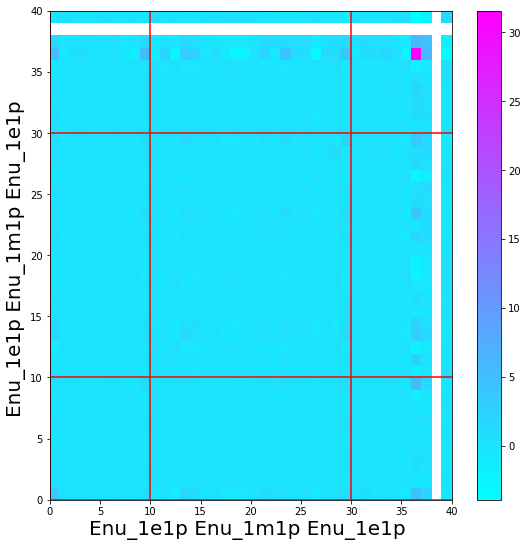

In [8]:
# Now, we can just make the dang thing!

# structure is [type of matrix]([variable for each channel],[#bins for each channel],[want to draw the matrix, too?])
# as for matrix types, we've got 'Nominal','Flat' and 'Polyfit'

dvarNumu = distVar('Enu_1m1p',(300,1000))
dvarNue = distVar('Enu_1e1p',(200,1200))
dvarPi0 = distVar('Enu_1e1p',(200,1200))   # i picked this arbitrarily because i don't know what we  plot for pi0s

codv = covpack.Nominal([dvarNue,dvarNumu,dvarPi0],[10,20,10],True)

#if you want to save this matrix somewhere, just
#np.save('covariance matrix name', cov)

In [10]:
# Rad! But which systematics are even included in that?

covpack.ListDetectorSystematics()

Detector Systematics: ['wiremodX', 'wiremodYZ', 'wiremoddEdx', 'LYdown', 'LYdownRayleigh', 'SCE', 'wiremodThetaYZ', 'wiremodThetaXZ']
Enabled: [1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
# And it looks like they're all enabled. Let's say we want to cut one, we feed in a list of ones and zeros where 1 means enable and 0 means disable, which correspond to each matrix
# Systematic ordering matches the given list.

#for example:
covpack.EnableDetectorSystematics([1,0,1,1,0,0,0,1])

wiremodX is enabled
wiremoddEdx is enabled
LYdown is enabled
wiremodThetaXZ is enabled
Enabled: [1, 0, 1, 1, 0, 0, 0, 1]


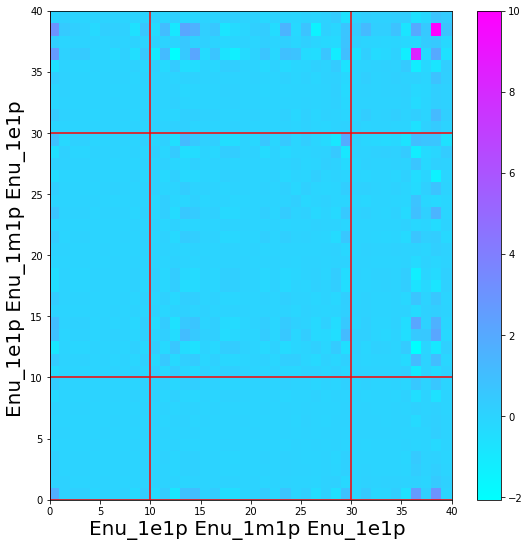

In [13]:
# Now if we make the matrix again, whoah! different!

cov = covpack.Nominal([dvarNue,dvarNumu,dvarPi0],[10,20,10],True) 

wiremodX 1e1p Polyfit Degrees: 0 9.167295455932617
wiremoddEdx 1e1p Polyfit Degrees: 0 6.821991443634033
LYdown 1e1p Polyfit Degrees: 0 4.72394323348999
wiremodThetaXZ 1e1p Polyfit Degrees: 0 5.431510925292969


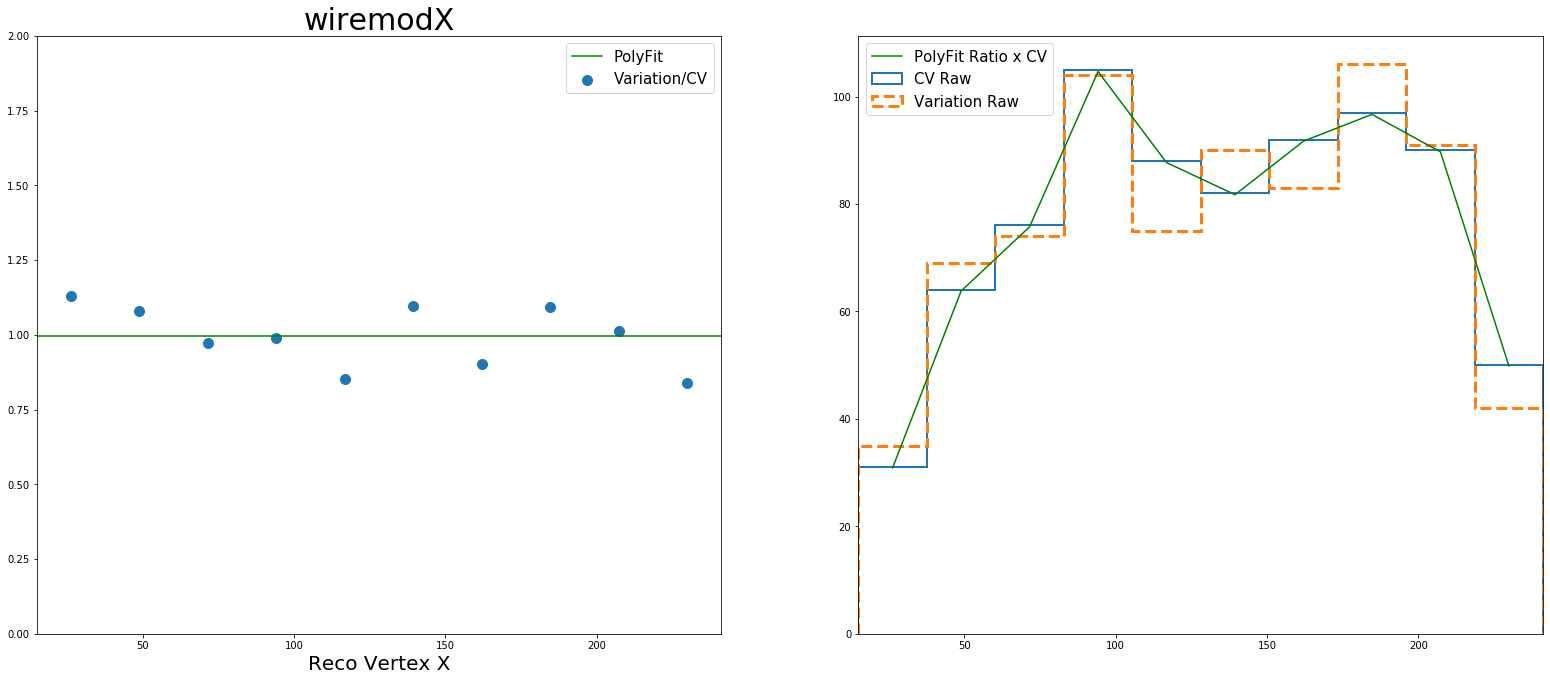

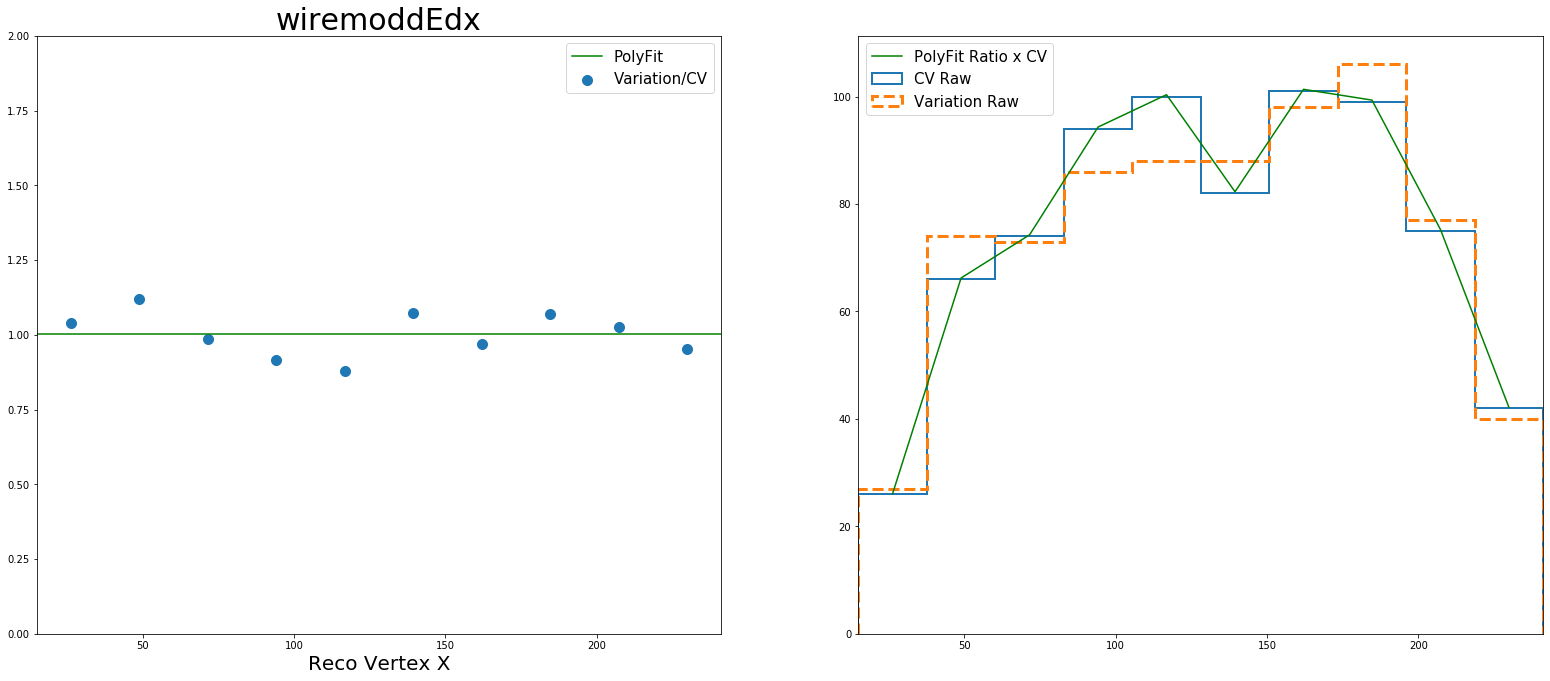

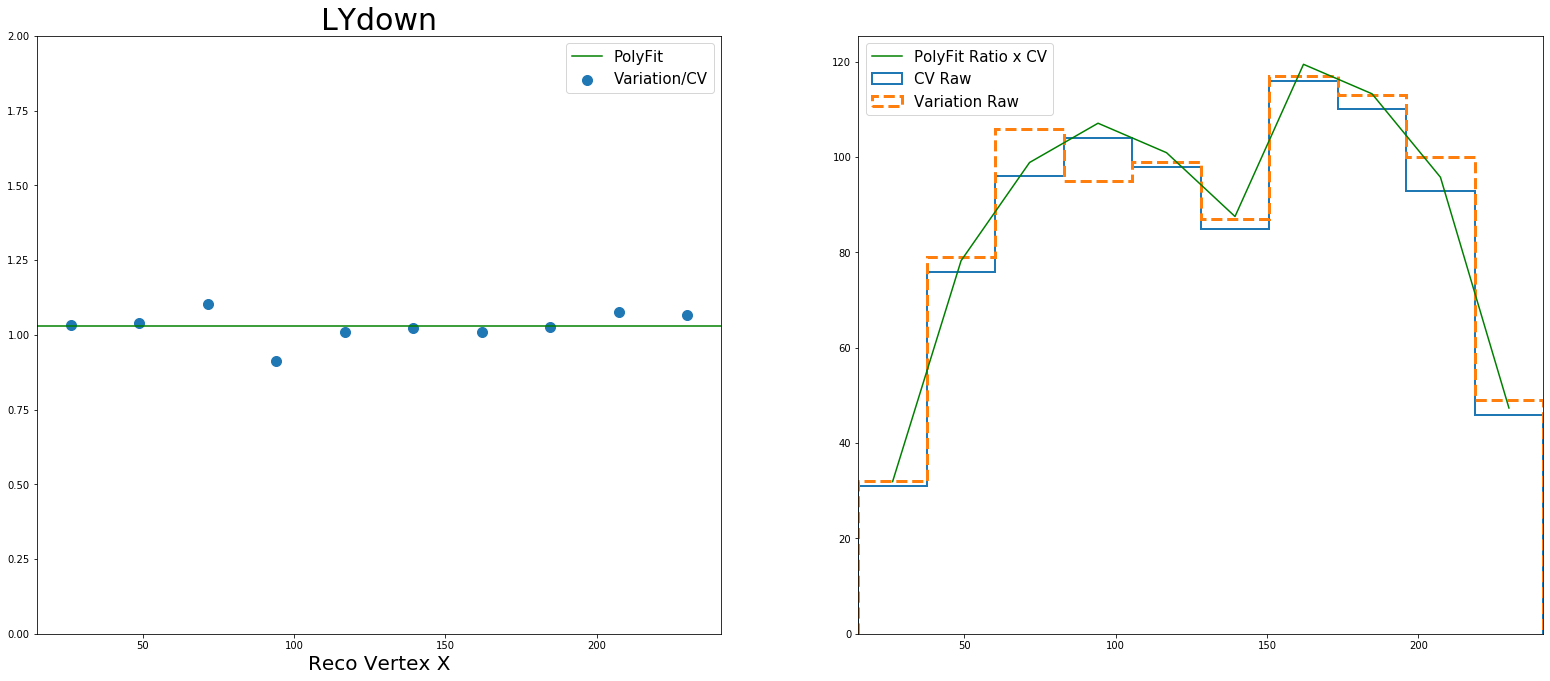

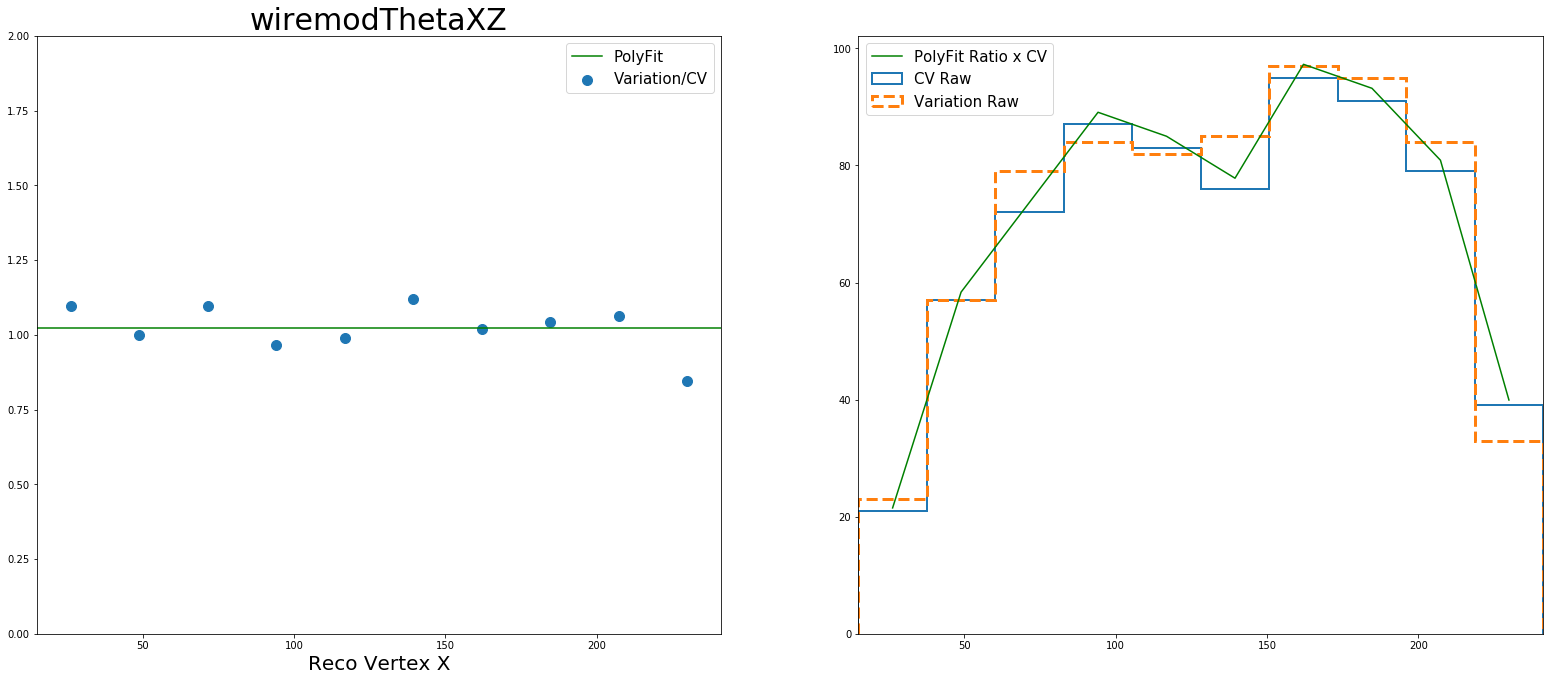

In [14]:
# Lastly, let's say you want to know specific details about what individual detector systematics look like for numus or nues. Well, you can do that, too.

# structure is ([variable],[#bins],[(0: numus, 1: nues)])
covpack.DetectorSystematicDiagnostics(myvariable,10,0)

#Below, you'll see, for each variation:
# - plots of the ratio and histograms with polyfit overlaid
# - the number of degrees that best suited the fit determined by the AIC parameter
# - the chi2/dof between the CV and the Variations in the histogram to the right.